## Spline Examples

Below are a few examples of the spline rating curve implementation.

In [1]:
from numpy.typing import ArrayLike
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import sys

if ".." not in sys.path:
    sys.path.insert(0, "..")

In [2]:
def PowerLaw(h: ArrayLike, a: ArrayLike, hs: ArrayLike, b: ArrayLike) -> np.ndarray:
    h = np.array(h)
    b_array = np.array(b)
    hs_array = np.array(hs).reshape((-1, 1))
    
    ho = np.ones((len(b_array), 1))
    ho[0] = 0

    X = np.log(np.clip(h - hs_array, 0, np.inf) + ho)

    logq = a + np.dot(b, X)

    q = np.exp(logq)
    
    return q

Now that we have created to equation function, let's generate some simulated data.

<function matplotlib.pyplot.show(close=None, block=None)>

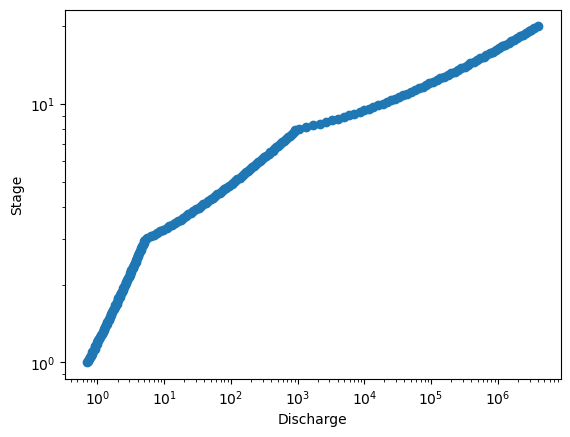

In [3]:
h = np.geomspace(1, 20, 201)
a = 0.01
hs = [0.2, 3.0, 8.]
b = [1.6, 2, 1.8]
q = PowerLaw(h, a, hs, b)
# Add some random noise in log space
q = np.exp(np.log(q) + np.random.randn(len(q)) * 0.01)

fig, ax = plt.subplots()
ax.loglog(q, h, marker='o', linestyle='')
ax.set(xlabel='Discharge', ylabel='Stage')
plt.show

Then fit the simulated data and plot the fits.

In [4]:
from ratingcurve.modelbuilder_ratings import SplineRatingModel

# initialize the model
# Default model configurations are okay, as we want uniform priors and 2 segments
powerrating = SplineRatingModel(method='nuts', model_config={'df': 20, 'mean':0, 'sd' :1})
powerrating.fit(h, q)
data = powerrating.table()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 13 seconds.
Sampling: [model_q, sigma, w]
Sampling: [model_q]


Sampling: [model_q]


<function matplotlib.pyplot.show(close=None, block=None)>

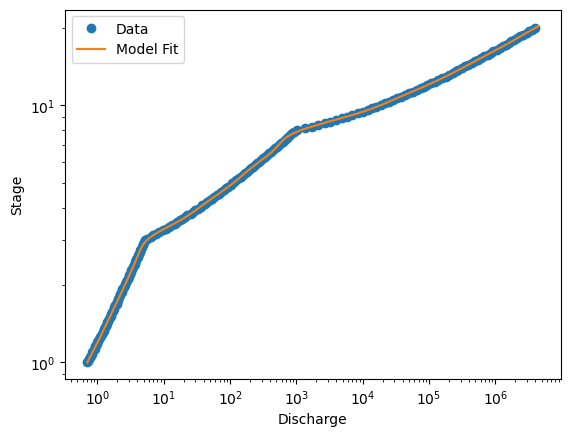

In [5]:
fig, ax = plt.subplots()
ax.loglog(q, h, marker='o', linestyle='', label='Data')
ax.loglog(data['discharge'], data['stage'], label='Model Fit')
ax.set(xlabel='Discharge', ylabel='Stage')
plt.legend()
plt.show

Sampling: [model_q]


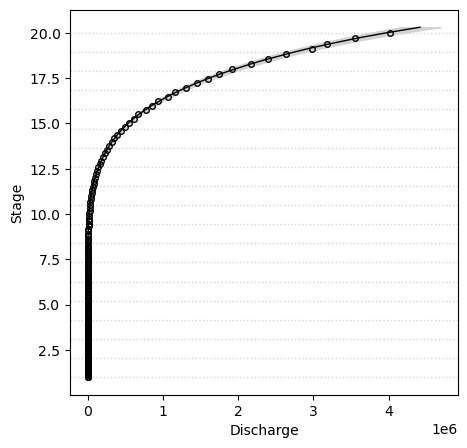

In [6]:
powerrating.plot()

Sampling: [model_q]


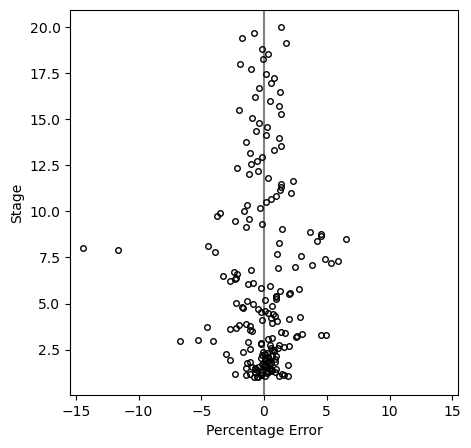

In [7]:
powerrating.plot_residuals()

Let's see how this fit compares with the original power law rating.

The original power law model fit the data pretty well considering it was not used to generate the data like the smooth power law model. Now let's test both models on some real data to see how they compare on something less bias toward a certain model.

<function matplotlib.pyplot.show(close=None, block=None)>

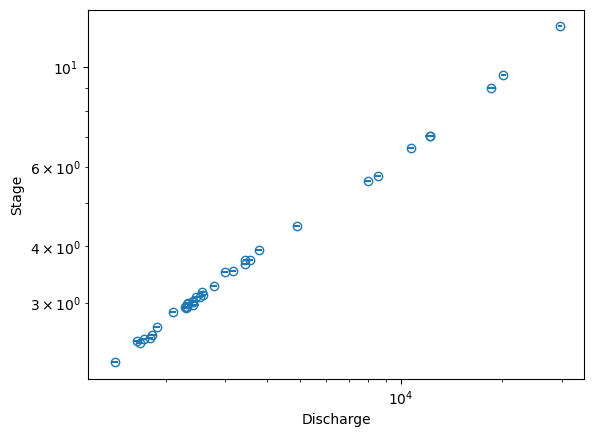

In [8]:
from ratingcurve import data

# load tutorial data
df = data.load('green channel')

fig, ax = plt.subplots()
ax.errorbar(df['q'], df['stage'], xerr=df['q_sigma'], marker='o', linestyle='', fillstyle='none')
ax.set(xlabel='Discharge', ylabel='Stage', xscale='log', yscale='log')
plt.show

In [9]:
# initialize the model
# Default model config is still good here
powerrating_gc = SplineRatingModel(method='nuts')
powerrating_gc.fit(df['stage'], df['q'], df['q_sigma'])
data_gc = powerrating_gc.table()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 14 seconds.
Sampling: [model_q, sigma, w]
Sampling: [model_q]


Sampling: [model_q]


<function matplotlib.pyplot.show(close=None, block=None)>

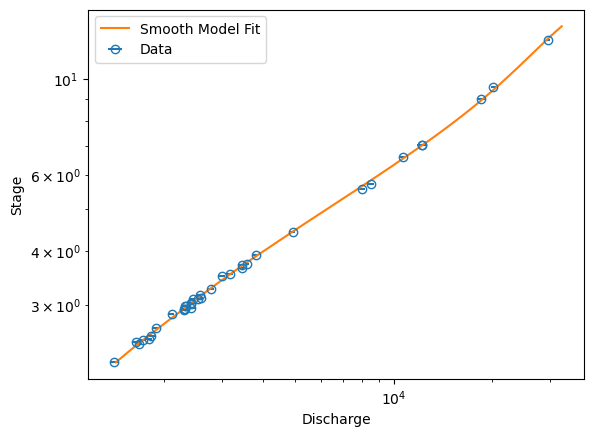

In [10]:
fig, ax = plt.subplots()
ax.errorbar(df['q'], df['stage'], xerr=df['q_sigma'], marker='o', linestyle='', fillstyle='none', label='Data')
ax.loglog(data_gc['discharge'], data_gc['stage'], label='Smooth Model Fit')
ax.set(xlabel='Discharge', ylabel='Stage', xscale='log', yscale='log')
plt.legend()
plt.show

Sampling: [model_q]


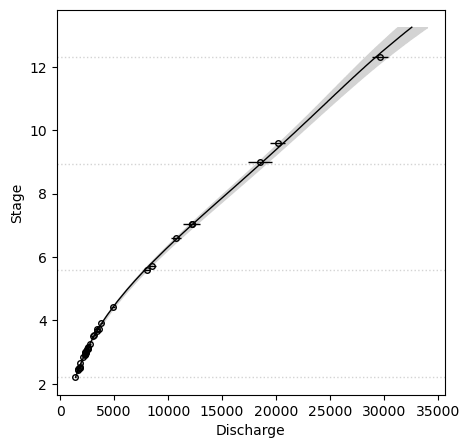

In [11]:
powerrating_gc.plot()